In [91]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Load COPX Data

In [92]:
copx = yf.Ticker("COPX").history(period="max", interval="1d").reset_index()
copx = copx.drop(columns=['Dividends', 'Stock Splits', 'Capital Gains'])
copx['Date'] = pd.to_datetime(copx['Date'].dt.date)
copx = copx.sort_values(by='Date')
copx.head(3)

,Date,Open,High,Low,Close,Volume
0,2010-04-20,33.153594,33.153594,32.597325,32.664078,1933
1,2010-04-21,32.486067,32.708574,32.063303,32.152306,2900
2,2010-04-22,32.018790,32.018790,31.529275,31.974291,3600


## Feature Engineering

In [93]:
# High and Low as a percentage of Open
copx['High/Open(%)'] = copx['High']/ copx['Open']
copx['Low/Open(%)'] = copx['Low'] / copx['Open']

# Daily return based on Close
copx['Daily Return'] = copx['Close'].pct_change()  

# Date features
copx['Day of Week'] = copx['Date'].dt.day_name()
copx['Month'] = copx['Date'].dt.month
copx['Year'] = copx['Date'].dt.year

# Lag features
LAGS_DAY = [1, 2, 3, 4, 5, 10, 15, 20]
for LAG_DAY in LAGS_DAY:
    copx[f'High/Open(%) [{LAG_DAY} day]'] = copx['High/Open(%)'].shift(LAG_DAY)
    copx[f'Low/Open(%) [{LAG_DAY} day]'] = copx['Low/Open(%)'].shift(LAG_DAY)

# Moving Averages
copx['MA5'] = copx['Close'].shift(1).rolling(window = 5).mean()
copx['MA10'] = copx['Close'].shift(1).rolling(window = 10).mean()
copx['MA20'] = copx['Close'].shift(1).rolling(window = 20).mean()
copx['MA100'] = copx['Close'].shift(1).rolling(window = 100).mean()


copx = copx.dropna().reset_index()
copx = copx.drop(columns=['index'])
copx.tail(3)

,Date,Open,High,Low,Close,Volume,High/Open(%),Low/Open(%),Daily Return,Day of Week,...,High/Open(%) [10 day],Low/Open(%) [10 day],High/Open(%) [15 day],Low/Open(%) [15 day],High/Open(%) [20 day],Low/Open(%) [20 day],MA5,MA10,MA20,MA100
3583,2024-12-05,42.380001,42.900002,42.299999,42.750000,1188400,1.012270,0.998112,0.005882,Thursday,...,1.009405,0.998354,1.005037,0.979611,1.009195,0.979540,42.478001,42.463000,42.6355,43.3335
3584,2024-12-06,42.639999,42.650002,41.889999,41.980000,1012100,1.000235,0.982411,-0.018012,Friday,...,1.009170,0.995062,1.017630,0.997062,1.026397,1.000000,42.592001,42.485001,42.5805,43.2952
3585,2024-12-09,43.509998,44.580002,43.509998,43.560001,2144200,1.024592,1.000000,0.037637,Monday,...,1.006851,0.997401,1.005049,0.987016,1.000000,0.966659,42.462000,42.404000,42.3565,43.2635


In [94]:
copx['PrevOpen'] = copx['Open'].shift(1)
copx['PrevHigh'] = copx['High'].shift(1)
copx['PrevLow'] = copx['Low'].shift(1)
copx['PrevClose'] = copx['Close'].shift(1)

#copx = copx.drop(columns=['Open', 'High', 'Low', 'Close'])
copx.head()

,Date,Open,High,Low,Close,Volume,High/Open(%),Low/Open(%),Daily Return,Day of Week,...,High/Open(%) [20 day],Low/Open(%) [20 day],MA5,MA10,MA20,MA100,PrevOpen,PrevHigh,PrevLow,PrevClose
0,2010-09-10,30.372251,30.461253,30.216496,30.439003,3733,1.002930,0.994872,0.005143,Friday,...,1.012235,1.000000,29.985088,28.974906,28.341872,27.250028,NaN,NaN,NaN,NaN
1,2010-09-13,31.084275,31.640543,31.017522,31.640543,3133,1.017895,0.997853,0.039474,Monday,...,1.000000,0.994364,30.140843,29.326468,28.490951,27.227777,30.372251,30.461253,30.216496,30.439003
2,2010-09-14,31.351277,32.041050,31.351277,31.707289,4133,1.022001,1.000000,0.002110,Tuesday,...,1.006452,1.000000,30.439003,29.702505,28.698996,27.222659,31.084275,31.640543,31.017522,31.640543
3,2010-09-15,31.596034,31.751791,31.573784,31.707289,1500,1.004930,0.999296,0.000000,Wednesday,...,1.012480,0.999220,30.826165,30.089666,28.900365,27.219989,31.351277,32.041050,31.351277,31.707289
4,2010-09-16,31.751797,31.863049,31.685044,31.863049,2867,1.003504,0.997898,0.004912,Thursday,...,1.000000,0.980769,31.155475,30.501304,29.041657,27.216207,31.596034,31.751791,31.573784,31.707289


### Using other ETFs

- First Quantum Minerals Ltd. (FM.TO)
- Lundin Mining Corporation (LUN.TO)
- Capstone Copper Corp. (CS.TO)
- Boliden AB (BOL.ST)
- Ivanhoe Mines Ltd. (IVN.TO)
- Glencore plc (GLEN.L)
- Southern Copper Corporation (SCCO)
- Teck Resources Limited (TECK.B.TO)
- Freeport-McMoRan Inc. (FCX)
- BHP Group Limited (BHP.AX)

In [95]:
tickers = ['FM.TO', 'LUN.TO', 'CS.TO', 'BOL.ST', 'IVN.TO'] 
LAG_DAYS = [1, 2, 3, 4, 5]
for ticker in tickers:
    data =  yf.Ticker(ticker).history(period="max", interval="1d").reset_index()
    data['Date'] = pd.to_datetime(data['Date'].dt.date)
    data = data.sort_values(by='Date')
    for LAG_DAY in LAG_DAYS:
        feature1 = f'{ticker} Daily Return [{LAG_DAY} day]'
        feature2 = f'{ticker} High/Open(%) [{LAG_DAY} day]'
        data[feature1] = data['Close'].pct_change().shift(LAG_DAY)
        data[feature2] = (data['High'] / data['Open']).shift(LAG_DAY)
        
        features = data[['Date', feature1, feature2]]
        copx = pd.merge(copx, features, on='Date', how='left')
        
copx

,Date,Open,High,Low,Close,Volume,High/Open(%),Low/Open(%),Daily Return,Day of Week,...,IVN.TO Daily Return [1 day],IVN.TO High/Open(%) [1 day],IVN.TO Daily Return [2 day],IVN.TO High/Open(%) [2 day],IVN.TO Daily Return [3 day],IVN.TO High/Open(%) [3 day],IVN.TO Daily Return [4 day],IVN.TO High/Open(%) [4 day],IVN.TO Daily Return [5 day],IVN.TO High/Open(%) [5 day]
0,2010-09-10,30.372251,30.461253,30.216496,30.439003,3733,1.002930,0.994872,0.005143,Friday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-09-13,31.084275,31.640543,31.017522,31.640543,3133,1.017895,0.997853,0.039474,Monday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-09-14,31.351277,32.041050,31.351277,31.707289,4133,1.022001,1.000000,0.002110,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-09-15,31.596034,31.751791,31.573784,31.707289,1500,1.004930,0.999296,0.000000,Wednesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-09-16,31.751797,31.863049,31.685044,31.863049,2867,1.003504,0.997898,0.004912,Thursday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,2024-12-03,43.090000,43.349998,42.529999,42.740002,1190100,1.006034,0.987004,0.009447,Tuesday,...,-0.007427,1.002110,0.011809,1.020845,-0.005339,1.001607,0.001604,1.020256,-0.020430,1.000000
3582,2024-12-04,42.720001,42.919998,42.360001,42.500000,873600,1.004682,0.991573,-0.005615,Wednesday,...,0.044896,1.019231,-0.007427,1.002110,0.011809,1.020845,-0.005339,1.001607,0.001604,1.020256
3583,2024-12-05,42.380001,42.900002,42.299999,42.750000,1188400,1.012270,0.998112,0.005882,Thursday,...,-0.014834,1.014322,0.044896,1.019231,-0.007427,1.002110,0.011809,1.020845,-0.005339,1.001607
3584,2024-12-06,42.639999,42.650002,41.889999,41.980000,1012100,1.000235,0.982411,-0.018012,Friday,...,0.014019,1.027055,-0.014834,1.014322,0.044896,1.019231,-0.007427,1.002110,0.011809,1.020845


## Baseline

### Baseline - buy and hold

Buy at the very first open, sell at the most recent close.

In [96]:
copx_baseline = yf.Ticker("COPX").history(period="max", interval="1d").reset_index()
copx_baseline = copx_baseline.drop(columns=['Dividends', 'Stock Splits', 'Capital Gains'])
copx_baseline['Date'] = pd.to_datetime(copx_baseline['Date'].dt.date)
copx_baseline = copx_baseline.sort_values(by='Date')
copx_baseline = copx_baseline.dropna().reset_index()
copx_baseline = copx_baseline.drop(columns=['index'])

In [97]:
principal = 100 # Starting dollars

buy_price = copx_baseline['Open'].iloc[0]
sell_price = copx_baseline['Close'].iloc[-1]

total_value = principal / buy_price * sell_price
profit_and_loss_percentage = (total_value - principal) / principal
profit_and_loss_percentage_formatted = f'{round(profit_and_loss_percentage, 4) * 100}%'
profit_and_loss_percentage_formatted

'31.39%'

### Baseline - buy daily, simple take profit threshold

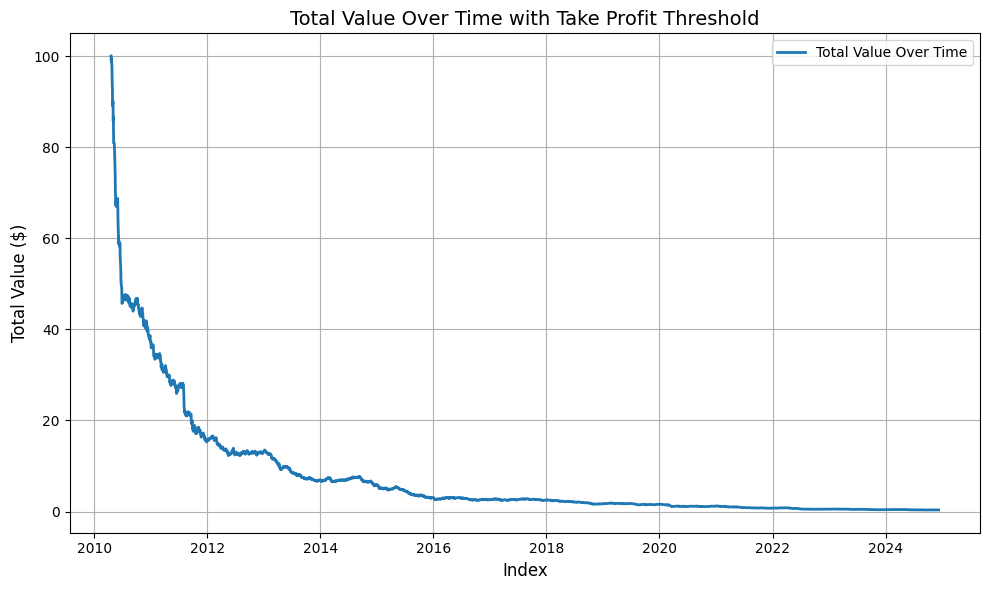

,Date,Open,High,Low,Close,Volume,Value Sold Per Stock,Total Value
0,2010-04-20,33.153590,33.153590,32.597322,32.664074,1933,32.664074,100
1,2010-04-21,32.486063,32.708570,32.063300,32.152302,2900,32.152302,98.972601
2,2010-04-22,32.018800,32.018800,31.529284,31.974300,3600,31.974300,98.835049
3,2010-04-23,31.863057,32.085564,31.707302,32.085564,1100,32.085564,99.525236
4,2010-04-26,33.287091,33.287091,32.041050,32.575066,3600,32.575066,97.396348
...,...,...,...,...,...,...,...,...
3681,2024-12-03,43.090000,43.349998,42.529999,42.740002,1190100,42.740002,0.35128
3682,2024-12-04,42.720001,42.919998,42.360001,42.500000,873600,42.500000,0.349471
3683,2024-12-05,42.380001,42.900002,42.299999,42.750000,1188400,42.803801,0.352966
3684,2024-12-06,42.639999,42.650002,41.889999,41.980000,1012100,41.980000,0.347503


In [98]:
principal = 100 # Starting dollars
take_profit_threshold = 1.01 # Can change

'''
stop_loss_threshold = 0.80 # Can change
def get_profit_loss(row):
    take_profit = row['Open'] * take_profit_threshold
    stop_loss = row['Open'] * stop_loss_threshold
    if row['Low'] <= stop_loss:
        return stop_loss
    if row['High'] >= take_profit:
        return take_profit
    
    return row['Close']
'''

# No stop loss, only take profit
def get_profit_loss(row):
    take_profit = row['Open'] * take_profit_threshold
    if row['High'] >= take_profit:
        return take_profit
    
    return row['Close']

copx_baseline['Value Sold Per Stock'] = copx_baseline.apply(get_profit_loss, axis=1)

copx_baseline['Total Value'] = None
for i in range(len(copx_baseline)):
    if i == 0:
        # The first row's Stock Value is the principal
        copx_baseline.loc[i, 'Total Value'] = principal
    else:
        # Calculate current row's Stock Value
        n_stocks = copx_baseline.loc[i - 1, 'Total Value'] / copx_baseline.loc[i, 'Open']
        copx_baseline.loc[i, 'Total Value'] = (
            n_stocks * copx_baseline.loc[i, 'Value Sold Per Stock']
        )

plt.figure(figsize=(10, 6))
plt.plot(copx_baseline['Date'].values, copx_baseline['Total Value'].values, label='Total Value Over Time', linewidth=2)

plt.title('Total Value Over Time with Take Profit Threshold', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Total Value ($)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

copx_baseline

In [99]:
sum(copx_baseline['Close'] - copx_baseline['Open']) # Close is often lower than Open

-117.90183591531593

## EDA

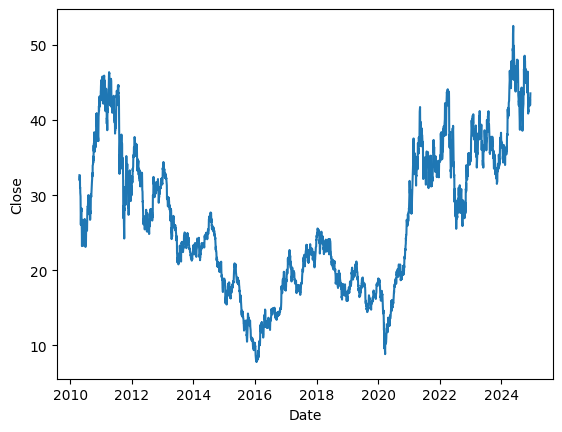

In [100]:
sns.lineplot(data=copx_baseline, x="Date", y="Close")
plt.show()

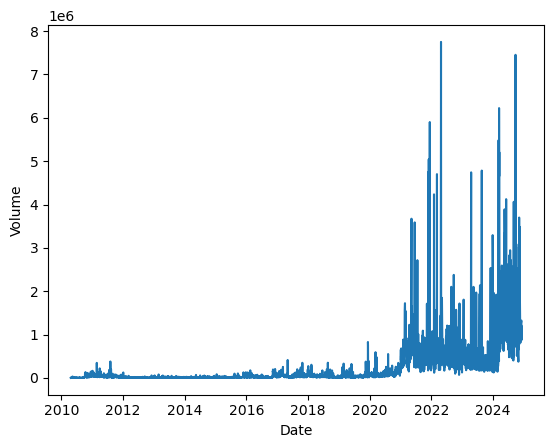

In [ ]:
sns.lineplot(data=copx_baseline, x="Date", y="Volume")
plt.show()

## Model - KNN

In [101]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [116]:
date = copx['Date']
open = copx['Open']
features = copx[['MA5', 'MA10', 'MA20', 'MA100', 'Open', 'High', 'Low', 'Close']]
target = copx['High/Open(%)']

features = features.dropna()
target = target.loc[features.index]
date = date.loc[features.index]
open = open.loc[features.index]

#scale 
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

featurestrain, featurestest, targettrain, targettest, datetrain, datetest, opentrain, opentest  = train_test_split(features_scaled, target, date, open, test_size=0.3, shuffle = False)

knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(featurestrain,targettrain)

highopenpred = knn.predict(featurestest)
results = pd.DataFrame({
    'Date' : datetest,
    'Open' : opentest,
    'Predicted High/Open(%)' : highopenpred
})

results = results.sort_values('Date')

for index, row in results.iterrows():
    if row['Predicted High/Open(%)'] > take_profit_threshold:
        results.at[index,'B/NB'] = 'B'
    else:
        results.at[index,'B/NB'] = 'NB'
print(results)

           Date       Open  Predicted High/Open(%) B/NB
2510 2020-08-31  20.187756                1.016530    B
2511 2020-09-01  20.472216                1.017090    B
2512 2020-09-02  20.940206                1.014332    B
2513 2020-09-03  20.591508                1.015270    B
2514 2020-09-04  20.196932                1.016028    B
...         ...        ...                     ...  ...
3581 2024-12-03  43.090000                1.005546   NB
3582 2024-12-04  42.720001                1.006853   NB
3583 2024-12-05  42.380001                1.007280   NB
3584 2024-12-06  42.639999                1.007491   NB
3585 2024-12-09  43.509998                1.008851   NB

[1076 rows x 4 columns]


## Results
If the label is 'B' then buy at open price, take profit at if stock hits the take profit threshold we set

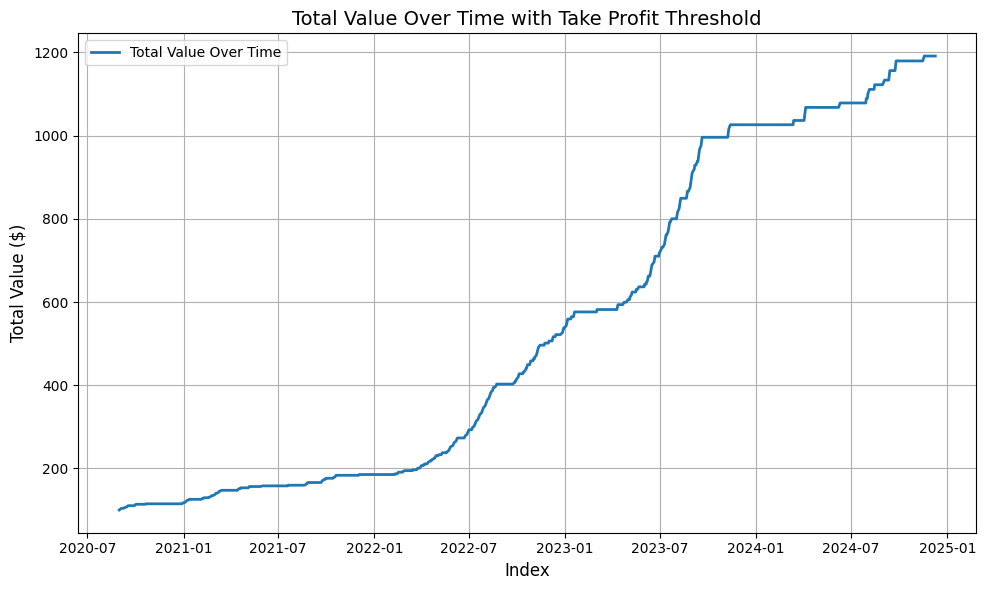

In [122]:
results = results.reset_index(drop=True)

for i, row in results.iterrows():
    if i == 0:
        results.at[i, 'Total Value'] = 100
    elif row['B/NB'] == 'B':
        n_stocks = results.loc[i-1, 'Total Value'] / row['Open']
        results.at[i, 'Total Value'] = n_stocks * row['Open'] * take_profit_threshold
    else:
        results.at[i, 'Total Value'] = results.loc[i-1, 'Total Value']

plt.figure(figsize=(10, 6))
plt.plot(results['Date'].values, results['Total Value'].values, label='Total Value Over Time', linewidth=2)

plt.title('Total Value Over Time with Take Profit Threshold', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Total Value ($)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 